## Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"D:\dataset\ev_charging_stations_india.csv")

In [3]:
data.head(5)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [4]:
data.tail(5)

,name,state,city,address,lattitude,longitude,type
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0
1546,Tata Power,Karnataka,Mangalore,"Auto Matrix, Bejai, Manjusha Building, Bejai, ...",12.885716,74.843476,7.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [6]:
data['lattitude'] = pd.to_numeric(data['lattitude'], errors ='coerce')

In [7]:
data['state'] = data['state'].str.title()

In [40]:
data.head()

,name,state,city,address,lattitude,longitude,type,cluster_label
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0,1
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0,1
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0,1
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0,1
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0,1


In [9]:
data.describe()

,lattitude,longitude,type
count,1539.000000,1.541000e+03,1539.000000
mean,19.992791,1.105323e+05,9.020793
std,7.121048,3.064996e+06,4.136436
min,8.390198,8.058454e+00,6.000000
25%,13.041693,7.562036e+01,7.000000
50%,19.114241,7.721257e+01,7.000000
75%,26.900894,7.847983e+01,11.000000
max,78.065400,8.510551e+07,24.000000


## Removing Null values And Ouliers

In [10]:
data.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     8
longitude     6
type          8
dtype: int64

In [11]:
data['longitude'].fillna(data['longitude'].mean(), inplace =True)
data['lattitude'].fillna(data['lattitude'].mean(), inplace =True)

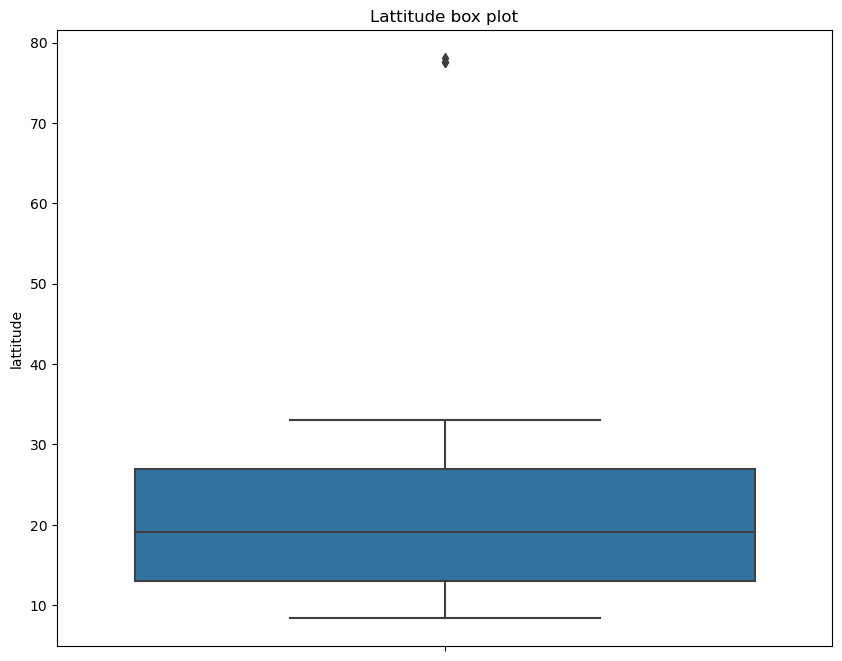

In [15]:
plt.figure(figsize =(10,8))
sns.boxplot(data = data,y='lattitude')
plt.title("Lattitude box plot")
plt.show()

In [16]:
Q3 = data['lattitude'].quantile(0.75)
Q1 = data['lattitude'].quantile(0.25)
IQR = Q3 - Q1
LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR
data = data[(data['lattitude']>=LL) & (data['lattitude']<= UL)]

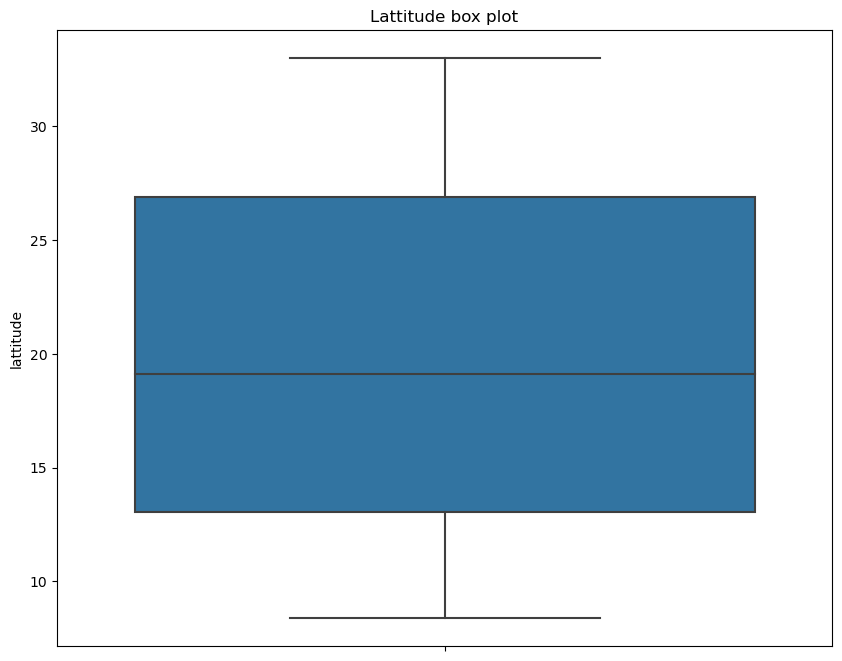

In [17]:
plt.figure(figsize =(10,8))
sns.boxplot(data = data,y='lattitude')
plt.title("Lattitude box plot")
plt.show()

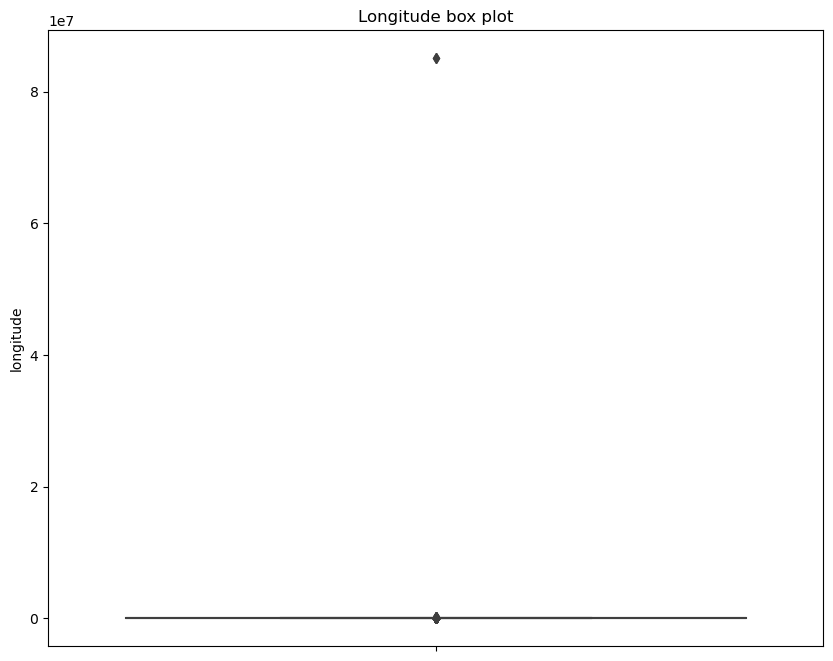

In [18]:
plt.figure(figsize =(10,8))
sns.boxplot(data = data,y='longitude')
plt.title("Longitude box plot")
plt.show()

In [19]:
q3 = data['longitude'].quantile(0.75)
q1 = data['longitude'].quantile(0.25)
iqr = q3 - q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
data = data[(data['longitude']>=ll) & (data['longitude']<= ul)]

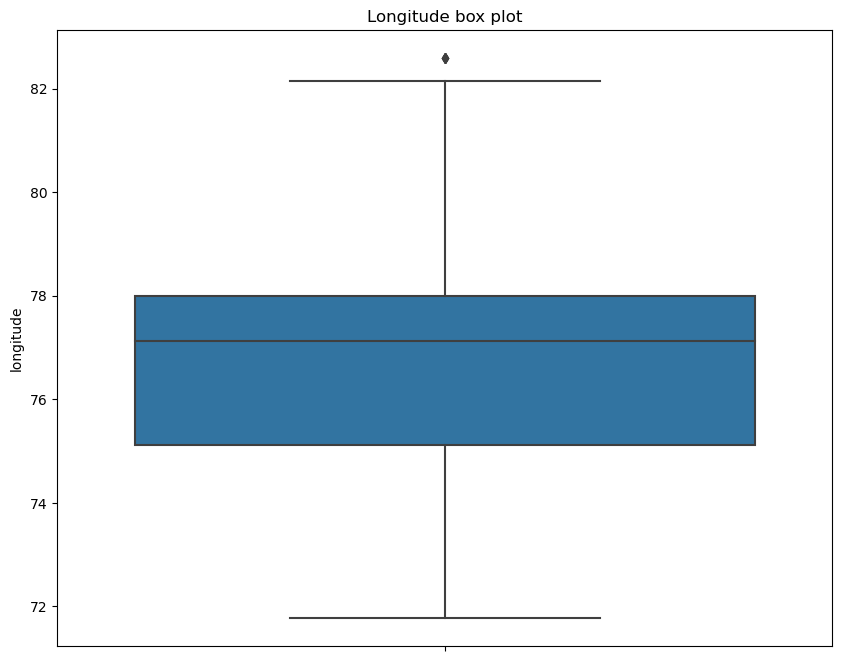

In [20]:
plt.figure(figsize =(10,8))
sns.boxplot(data = data,y='longitude')
plt.title("Longitude box plot")
plt.show()

## EDA

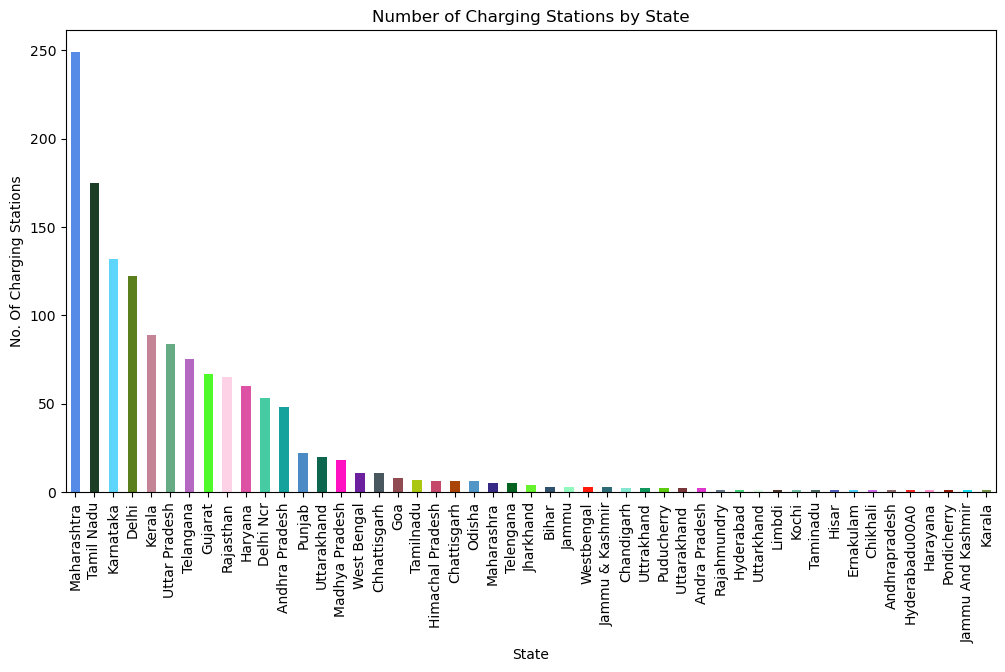

In [24]:
import random
state_counts = data['state'].value_counts()
num_colors = len(state_counts)
# random_colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(num_colors)]

plt.figure(figsize=(12, 6))

state_counts.plot(kind='bar', color=random_colors)
plt.title('Number of Charging Stations by State')
plt.xlabel('State')
plt.ylabel('No. Of Charging Stations')
plt.xticks(rotation=90)  
plt.show()

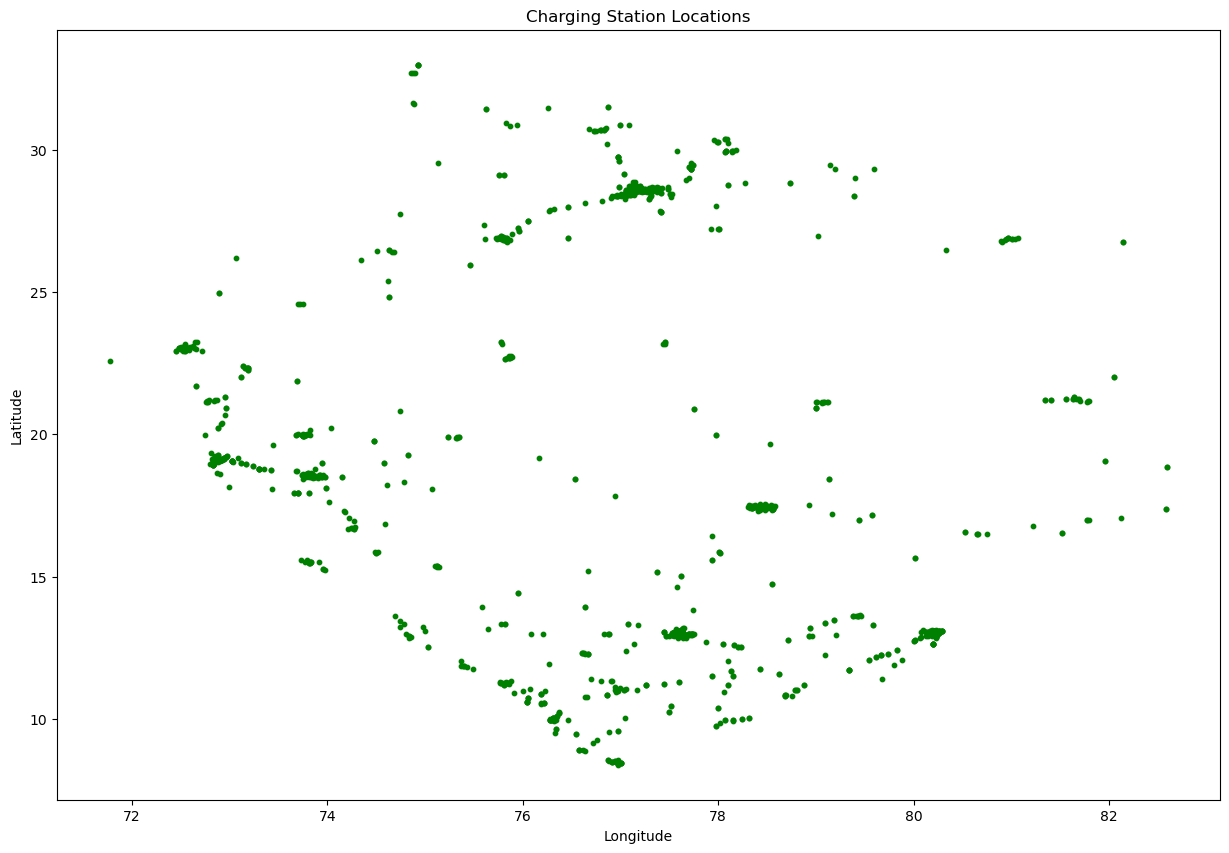

In [28]:
plt.figure(figsize=(15, 10))
plt.scatter(data['longitude'], data['lattitude'],color= 'green',s=10, alpha=1)
plt.title('Charging Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Model building

In [32]:
from sklearn.cluster import KMeans

features = data[['lattitude', 'longitude']]

num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters)

# Fit the K-means model to the data
kmeans.fit(features)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
data['cluster_label'] = cluster_labels

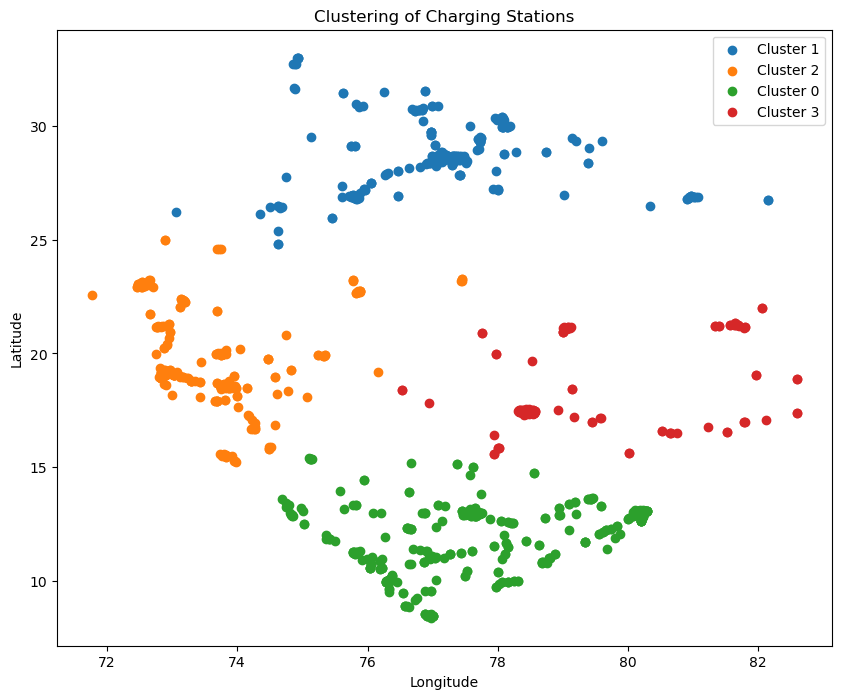

In [33]:
import matplotlib.pyplot as plt

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))
for cluster in data['cluster_label'].unique():
    cluster_data = data[data['cluster_label'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['lattitude'], label=f'Cluster {cluster}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Charging Stations')
plt.legend()
plt.show()

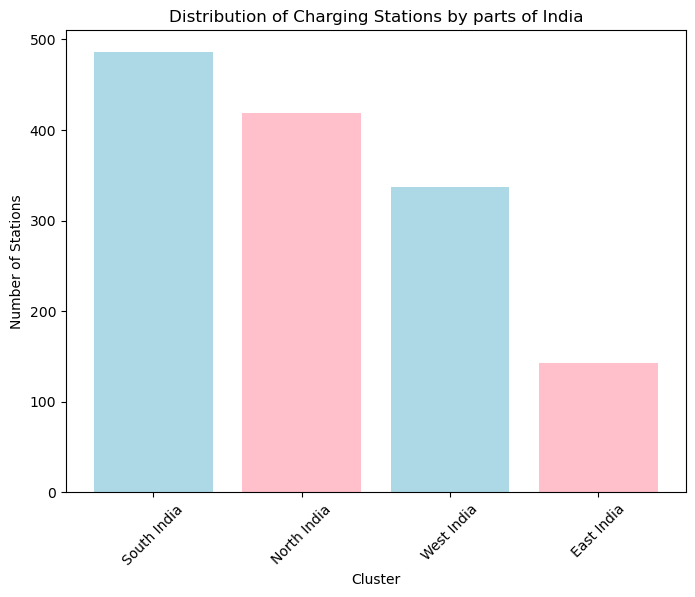

In [39]:
cluster_names = {
    0: 'South India',
    1: 'North India',
    2: 'West India',
    3: 'East India'
}

# Group the DataFrame by cluster label and count the data points in each cluster
cluster_counts = data.groupby('cluster_label').size()

# Create a bar plot of the cluster counts
plt.figure(figsize=(8, 6))
plt.bar(cluster_names.values(), cluster_counts,color =['lightblue','pink','lightblue','pink'])
plt.xlabel('Cluster')
plt.ylabel('Number of Stations')
plt.title('Distribution of Charging Stations by parts of India')
plt.xticks(rotation=45)
plt.show()